**Tarea 4:** Ejercicio: aproximar la integral de:

$$\displaystyle \int_0^1e^{-\frac{t^2}{2}}dt \approx .855624391892149$$

|n  |grado|# (num de nodos + num de pesos)|pesos: $w_i, w_{i+1}$    |nodos: $x_i, x_{i+1}$              |
|---|:----:|:---:|:-------:|:-----------------:|
|0  |1|2|2|0|
|1  |3|4|1,1|-$\sqrt{\frac{1}{3}}$,$\sqrt{\frac{1}{3}}$|
|2  |5|6|$\frac{5}{9}$, $\frac{8}{9}$, $\frac{5}{9}$ |$-\sqrt{\frac{3}{5}}$, 0, $\sqrt{\frac{3}{5}}$  |
|3  |7|8|0.347855, 0.652145, 0.652145, 0.347855|-0.861136,-0.339981,0.339981,0.861136|
|4  |9|10|0.236927, 0.478629, 0.568889, 0.478629, 0.236927 | -0.90618, -0.538469, 0, 0.538469, 0.90618|

Y para una integral en $[a,b]$ se utiliza la fórmula de cambio de variable:

$$\displaystyle \int_{a}^{b}f(t)dt \approx \frac{(b-a)}{2} \displaystyle \sum_{i=0}^nw_if \left (\frac{1}{2}[(b-a)x_i+a+b] \right )$$

**_Solución_:** Creemos primero la función que integrará:

In [1]:
# Esto lo hice para verificar si los número que copie de la tabla de arriba son los adecuados:
from numpy.polynomial.legendre import leggauss

In [15]:
leggauss(1)

(array([0.]), array([2.]))

In [16]:
leggauss(2)

(array([-0.57735027,  0.57735027]), array([1., 1.]))

In [17]:
leggauss(3)

(array([-0.77459667,  0.        ,  0.77459667]),
 array([0.55555556, 0.88888889, 0.55555556]))

In [18]:
leggauss(4)

(array([-0.86113631, -0.33998104,  0.33998104,  0.86113631]),
 array([0.34785485, 0.65214515, 0.65214515, 0.34785485]))

In [8]:
leggauss(5)

(array([-0.90617985, -0.53846931,  0.        ,  0.53846931,  0.90617985]),
 array([0.23692689, 0.47862867, 0.56888889, 0.47862867, 0.23692689]))

In [2]:
def GLf(f,a,b,n): #GLf: Gauss-Legendre quadrature for f
    """
    Compute numerical approximation using quadrature Gauss-Legendre.
    Weights and nodes are obtained with table for n=0,1,2,3,4
    Args:
        f (function): function expression of integrand
        a (float): left point of interval
        b (float): right point of interval
        n (float): number of subintervals
    Returns:
        sum_res (float): numerical approximation to integral of f in the interval a,b
    """
    
    if(n == 0):
        w = [2]
        x = [0]
        sum_res = w[0]*f((1/2)*((b-a)*x[0]+a+b))
        sum_res = (b-a)*sum_res/2
        return sum_res
    
    elif(n == 1):
        w = [1,1]
        x = [-pow(1/3,1/2),pow(1/3,1/2)]
        
        sum_res = w[0]*f((1/2)*((b-a)*x[0]+a+b)) + w[1]*f((1/2)*((b-a)*x[1]+a+b))
        sum_res = (b-a)*sum_res/2
        return sum_res
        
    elif(n == 2):
        w = [5/9,8/9,5/9]
        x = [-pow(3/5,1/2),0,pow(3/5,1/2)]
        
        sum_res = w[0]*f((1/2)*((b-a)*x[0]+a+b)) + w[1]*f((1/2)*((b-a)*x[1]+a+b)) + w[2]*f((1/2)*((b-a)*x[2]+a+b))
        sum_res = (b-a)*sum_res/2
        return sum_res
    
    elif(n == 3):
        w = [0.347855,0.652145,0.652145,0.347855]
        x = [-0.861136,-0.339981,0.339981,0.861136]
        
        sum_res = w[0]*f((1/2)*((b-a)*x[0]+a+b)) + w[1]*f((1/2)*((b-a)*x[1]+a+b)) + w[2]*f((1/2)*((b-a)*x[2]+a+b)) + w[3]*f((1/2)*((b-a)*x[3]+a+b))
        sum_res = (b-a)*sum_res/2
        return sum_res
     
    elif(n == 4):
        w = [0.236927,0.478629,0.568889,0.478629,0.236927]
        x = [-0.90618,-0.538469,0,0.538469,0.90618]
        
        sum_res = w[0]*f((1/2)*((b-a)*x[0]+a+b)) + w[1]*f((1/2)*((b-a)*x[1]+a+b)) + w[2]*f((1/2)*((b-a)*x[2]+a+b)) + w[3]*f((1/2)*((b-a)*x[3]+a+b)) + w[4]*f((1/2)*((b-a)*x[4]+a+b))
        sum_res = (b-a)*sum_res/2
        return sum_res
    
    
    """
    Algorítmo original pero erróneo por alguna razón que no detecto en el for, la solución de arriba que si satisface el teste según los errores calculados abajo, es provicional
    debido a que es muy específica
    else:
        if(n == 1):
            w = [1,1]
            x = [-pow(1/3,1/2),pow(1/3,1/2)]

        elif(n == 2):
            w = [5/9,8/9,5/9]
            x = [-pow(3/5,1/2),0,pow(3/5,1/2)]

        elif(n == 3):
            w = [0.347855,0.652145,0.652145,0.347855]
            x = [-0.861136,-0.339981,0.339981,0.861136]

        elif(n == 4):
            w = [0.236927,0.478629,0.568889,0.478629,0.236927]
            x = [-0.90618,-0.538469,0,0.538469,0.90618]

        for i in range(0,n):
            sum_res += w[i]*f((1/2)*((b-a)*x[i]+a+b))
            i+=1
        sum_res = ((b-a)/2)*sum_res
        return sum_res
    
    """

In [3]:
import numpy as np
import math

Definamos la función a integrar y los parámetros para la función que la integrará

In [4]:
f = lambda x : math.exp((-pow(x,2))/2)
print(f(0))
a = 0
b = 1
n = range(0,5)
for i in n:
    print(n[i])

1.0
0
1
2
3
4


Veamos si funciona nuestro algoritmo para integrar.

In [5]:
for i in range(0,len(n)):
    print("El valor de la integral para n=" + str(n[i]) + " es: ")
    print(GLf(f,a,b,n[i]))
    print(" ")

El valor de la integral para n=0 es: 
0.8824969025845955
 
El valor de la integral para n=1 es: 
0.8553145616837845
 
El valor de la integral para n=2 es: 
0.8556263940426317
 
El valor de la integral para n=3 es: 
0.8556243937941527
 
El valor de la integral para n=4 es: 
0.8556248255858607
 


Ahora creemos el módulo de esta función.

In [6]:
%%file gauss_legendre_quadrature.py
def GLf(f,a,b,n): #GLf: Gauss-Legendre quadrature for f
    """
    Compute numerical approximation using quadrature Gauss-Legendre.
    Weights and nodes are obtained with table for n=0,1,2,3,4
    Args:
        f (function): function expression of integrand
        a (float): left point of interval
        b (float): right point of interval
        n (float): number of subintervals
    Returns:
        sum_res (float): numerical approximation to integral of f in the interval a,b
    """
    
    if(n == 0):
        w = [2]
        x = [0]
        sum_res = w[0]*f((1/2)*((b-a)*x[0]+a+b))
        sum_res = (b-a)*sum_res/2
        return sum_res
    
    elif(n == 1):
        w = [1,1]
        x = [-pow(1/3,1/2),pow(1/3,1/2)]
        
        sum_res = w[0]*f((1/2)*((b-a)*x[0]+a+b)) + w[1]*f((1/2)*((b-a)*x[1]+a+b))
        sum_res = (b-a)*sum_res/2
        return sum_res
        
    elif(n == 2):
        w = [5/9,8/9,5/9]
        x = [-pow(3/5,1/2),0,pow(3/5,1/2)]
        
        sum_res = w[0]*f((1/2)*((b-a)*x[0]+a+b)) + w[1]*f((1/2)*((b-a)*x[1]+a+b)) + w[2]*f((1/2)*((b-a)*x[2]+a+b))
        sum_res = (b-a)*sum_res/2
        return sum_res
    
    elif(n == 3):
        w = [0.347855,0.652145,0.652145,0.347855]
        x = [-0.861136,-0.339981,0.339981,0.861136]
        
        sum_res = w[0]*f((1/2)*((b-a)*x[0]+a+b)) + w[1]*f((1/2)*((b-a)*x[1]+a+b)) + w[2]*f((1/2)*((b-a)*x[2]+a+b)) + w[3]*f((1/2)*((b-a)*x[3]+a+b))
        sum_res = (b-a)*sum_res/2
        return sum_res
     
    elif(n == 4):
        w = [0.236927,0.478629,0.568889,0.478629,0.236927]
        x = [-0.90618,-0.538469,0,0.538469,0.90618]
        
        sum_res = w[0]*f((1/2)*((b-a)*x[0]+a+b)) + w[1]*f((1/2)*((b-a)*x[1]+a+b)) + w[2]*f((1/2)*((b-a)*x[2]+a+b)) + w[3]*f((1/2)*((b-a)*x[3]+a+b)) + w[4]*f((1/2)*((b-a)*x[4]+a+b))
        sum_res = (b-a)*sum_res/2
        return sum_res
    
    
    """
    Algorítmo original pero erróneo por alguna razón que no detecto en el for, la solución de arriba que si satisface el teste según los errores calculados abajo, es provicional
    debido a que es muy específica
    else:
        if(n == 1):
            w = [1,1]
            x = [-pow(1/3,1/2),pow(1/3,1/2)]

        elif(n == 2):
            w = [5/9,8/9,5/9]
            x = [-pow(3/5,1/2),0,pow(3/5,1/2)]

        elif(n == 3):
            w = [0.347855,0.652145,0.652145,0.347855]
            x = [-0.861136,-0.339981,0.339981,0.861136]

        elif(n == 4):
            w = [0.236927,0.478629,0.568889,0.478629,0.236927]
            x = [-0.90618,-0.538469,0,0.538469,0.90618]

        for i in range(0,n):
            sum_res += w[i]*f((1/2)*((b-a)*x[i]+a+b))
            i+=1
        sum_res = ((b-a)/2)*sum_res
        return sum_res
    

Writing gauss_legendre_quadrature.py


Se aprecia que conforme mayor sea n, más se aproxima la integral al valor real aunque con *n=4* no fue suficiente para ser un valor aceptable.

Veamos ahora los errores

In [10]:
def rae(approx, obj):
    abs_obj = pow(pow(obj,2),1/2)
    abs_ao = pow(pow(approx - obj,2),1/2)
    if(abs_obj > 0 ):
        return abs_ao/abs_obj
    else:
        return abs_ao

In [12]:
obj = 0.855624391892149

In [13]:
for i in range(0,len(n)):
    print("El error de la integral para n=" + str(n[i]) + " es: ")
    print(rae(GLf(f,a,b,n[i]),obj))
    print(" ")

El error de la integral para n=0 es: 
0.03140690114387683
 
El error de la integral para n=1 es: 
0.0003621100699096914
 
El error de la integral para n=2 es: 
2.3399876180606825e-06
 
El error de la integral para n=3 es: 
2.2229423140576968e-09
 
El error de la integral para n=4 es: 
5.068739458934811e-07
 


Creemos la gráfica:

In [14]:
import matplotlib.pyplot as plt

In [17]:
err = []
for i in range(0,len(n)):
    err.append(rae(GLf(f,a,b,n[i]),obj))
err

[0.03140690114387683,
 0.0003621100699096914,
 2.3399876180606825e-06,
 2.2229423140576968e-09,
 5.068739458934811e-07]

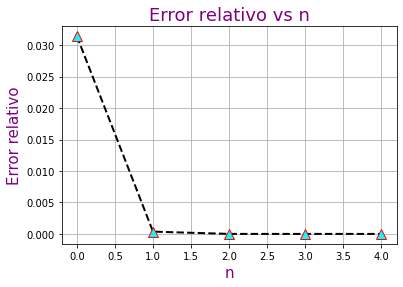

In [18]:
plt.plot(n,err, c = "black" , ls = '--' , marker = '^' , linewidth=2.0 , markersize = 10.0 , markeredgecolor='red' , markerfacecolor = 'cyan')
plt.title("Error relativo vs n" , fontsize = 18 , color = "purple")
plt.xlabel("n" , fontsize = 15 , color = "purple")
plt.ylabel("Error relativo" , fontsize = 15 , color = "purple")
plt.grid(True)
plt.show()

In [19]:
plt.savefig('Grafica_2.png')

<Figure size 432x288 with 0 Axes>